<a href="https://colab.research.google.com/github/A01707504/Actividad-4-Regresi-n-Lineal-Simple-/blob/main/Actividad_4_(Regresi%C3%B3n_Lineal_Simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4 (Regresión Lineal Simple)**

### Analítica de datos y herramientas de inteligencia artificial II (Gpo 501)

**Profesor:** Alfredo García Suárez
Alfredo García Suárez

**Alumno:** Ricardo Saldaña Muñoz | A01707504

***Fecha:*** 09 de octubre de 2023

Importamos primero las librerías que utilizaríamos para esta actividad.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Hecho esto cargamos el dataset que utilizaremos el cual tiene el nombre de DF_Mexico.csv, y también definimos una opción con pd.set_option para que nos muestre todas las columnas del dataset y así poder visualizar cuales son los atributos significantes.

In [ ]:
df= pd.read_csv('/content/DF_Mexico.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,3,7,['phone'],t,f,NaN,Coyoacán,NaN,19.35353,-99.16299,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,19,49,324,2023-03-30,21,0,0,2014-01-03,2018-06-24,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,NaN,3,3,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,NaN,19.35358,-99.16948,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,11,41,71,346,2023-03-30,61,1,0,2014-01-01,2022-11-04,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,4,4,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,NaN,19.44180,-99.18402,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,NaN,t,0,0,0,87,2023-03-29,39,2,0,2012-10-31,2022-12-21,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-2

Imprimimos la información del dataset para poder observar la cantidad de columnas, cantidad de filas y tipo de variable de cada atributo. De igual manera al observar la información del dataset, observamos que hay columnas que tenían valores faltantes por lo que es necesario generar un tratamiento de los datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

Definimos un código para que se muestren las columnas con valores nulos, así como la cantidad de valores nulos con los que se cuentan.

In [ ]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

name                                1
description                       928
neighborhood_overview            9079
host_location                    5172
host_about                      10664
host_response_time               3091
host_response_rate               3091
host_acceptance_rate             2043
host_is_superhost                   5
host_neighbourhood              12401
neighbourhood                    9079
neighbourhood_group_cleansed    24224
bathrooms                       24224
bathrooms_text                     30
bedrooms                          555
beds                              271
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maximum_nights              1
maximum_maximum_nights              1
minimum_nights_avg_ntm              1
maximum_nights_avg_ntm              1
calendar_updated                24224
first_review                     3596
last_review                      3596
review_scores_rating             3596
review_score

Al observar la cantidad de nulos existentes en las múltiples columnas, vemos que es necesario tratar esos nulos de manera que ya no haya valores faltantes. Para su tratamiento eliminaremos todas las columnas que no sean cuantitativas a excepción de la de property_type, la cual sus datos se pondrán como index ya que más adelante nos ayudará a generar un análisis requerido.

In [ ]:
df.set_index("room_type", inplace=True)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,3,7,['phone'],t,f,NaN,Coyoacán,NaN,19.35353,-99.16299,Entire loft,3,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,19,49,324,2023-03-30,21,0,0,2014-01-03,2018-06-24,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
Entire home/apt,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,NaN,3,3,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,NaN,19.35358,-99.16948,Entire guest suite,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,11,41,71,346,2023-03-30,61,1,0,2014-01-01,2022-11-04,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
Entire home/apt,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,4,4,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,NaN,19.44180,-99.18402,Entire rental unit,6,NaN,2 baths,3.0,3.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,NaN,t,0,0,0,87,2023-03-29,39,2,0,2012-10-31,2022-12-21,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31

Hecho esto procedemos primero transformamos algunas columnas que aparecen como object pero en realidad contienen valores númericos, entonces los transformamos a float.

In [ ]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float) / 100.0
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float) / 100.0
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '').astype(float)
df['number_of_reviews'] = df['number_of_reviews'].astype(float)
df['availability_365'] = df['availability_365'].astype(float)
df['reviews_per_month'] = df['reviews_per_month'].astype(float)

<ipython-input-33-63fc43b8be30>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').astype(float)


Después con el siguiente código eliminamos las filas que no contengan valores cuantitativos.

In [ ]:
columnas_a_eliminar = df.select_dtypes(include=['object']).columns
df = df.drop(columns=columnas_a_eliminar)

Imprimimos de nuevo que nos muestren la cantidad de nulos por columna para comenzar el tratamiento.

In [ ]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

host_response_rate               3091
host_acceptance_rate             2043
neighbourhood_group_cleansed    24224
bathrooms                       24224
bedrooms                          555
beds                              271
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maximum_nights              1
maximum_maximum_nights              1
minimum_nights_avg_ntm              1
maximum_nights_avg_ntm              1
calendar_updated                24224
review_scores_rating             3596
review_scores_accuracy           3652
review_scores_cleanliness        3651
review_scores_checkin            3652
review_scores_communication      3652
review_scores_location           3653
review_scores_value              3653
license                         24224
reviews_per_month                3596
dtype: int64

Al observar las columnas que contienen valores nulos, se definió que las columnas "neighbourhood_group_cleansed", "bathrooms ", "calendar_updated" y "license ", no tienen ningún valor por lo que eliminamos esas columnas.

In [ ]:
col_a_eliminar = ["neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "license"]
df = df.drop(col_a_eliminar, axis=1)
df.head(50)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2056638,20230329041210,10531228,1.00,NaN,3,7,19.353530,-99.162990,3,1.0,1.0,1434.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324.0,21.0,0,0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3,3,0,0,0.19
Entire home/apt,2072354,20230329041210,16840050,NaN,NaN,3,3,19.353580,-99.169480,2,1.0,1.0,830.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346.0,61.0,1,0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2,2,0,0,0.54
Entire home/apt,696037,20230329041210,3531879,1.00,0.90,4,4,19.441800,-99.184020,6,3.0,3.0,1469.0,24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87.0,39.0,2,0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,3,3,0,0,0.31
Entire home/apt,35797,20230329041210,153786,NaN,NaN,1,1,19.382830,-99.271780,2,1.0,1.0,3658.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
Entire home/apt,44616,20230329041210,196253,1.00,0.86,16,16,19.411620,-99.177940,14,5.0,8.0,18000.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357.0,64.0,12,1,4.58,4.56,4.70,4.87,4.78,4.98,4.48,12,3,2,0,0.46
Entire home/apt,2075738,20230329041210,2339771,1.00,0.70,1,2,19.419090,-99.160430,2,1.0,1.0,2561.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,2,13,19,240.0,78.0,16,1,4.87,4.90,4.71,4.91,4.85,5.00,4.83,1,1,0,0,0.70
Entire home/apt,56074,20230329041210,265650,1.00,0.95,2,6,19.439770,-99.156050,2,1.0,1.0,650.0,3,250,3.0,3.0,250.0,250.0,3.0,250.0,0,0,0,144.0,84.0,15,0,4.87,4.95,4.88,4.98,4.94,4.75,4.79,1,1,0,0,0.58
Private room,61792,20230329041210,299558,1.00,1.00,2,3,19.410830,-99.180570,2,1.0,1.0,1089.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,18,48,78,168.0,62.0,6,0,4.92,4.89,4.90,4.92,4.95,4.94,4.87,2,0,2,0,0.94
Entire home/apt,704779,20230329041210,2872228,1.00,1.00,13,14,19.431030,-99.146610,2,1.0,1.0,943.0,2,60,2.0,2.0,1125.0,1125.0,2.0,1125.0,25,42,66,156.0,18.0,3,1,4.72,4.75,4.75,4.63,4.75,4.88,4.81,13,11,2,0,0.15


Antes de poder definir que manera es la más adecuada para llenar las columnas, se describe a continuación lo que nos dice cada variable para ver de que manera es mejor tratar los valores nulos.

### **Variables:**
1. `id`: El ID único de la propiedad o anuncio.
2. `scrape_id`: El ID único de la extracción o recopilación de datos.
3. `host_id`: El ID único del anfitrión (dueño del alojamiento).
4. `host_listings_count`: El número total de propiedades que el anfitrión tiene en su perfil.
5. `host_total_listings_count`: El número total de propiedades que el anfitrión tiene en su perfil (puede ser igual a `host_listings_count`).
6. `latitude`: La latitud de la ubicación de la propiedad.
7. `longitude`: La longitud de la ubicación de la propiedad.
8. `accommodates`: El número de personas que la propiedad puede acomodar.
9. `bedrooms`: El número de dormitorios en la propiedad.
10. `beds`: El número de camas en la propiedad.
11. `minimum_nights`: El número mínimo de noches que un huésped debe reservar para esa propiedad.
12. `maximum_nights`: El número máximo de noches que un huésped puede reservar para esa propiedad.
13. `minimum_minimum_nights`: La cantidad mínima de noches mínimas en reservas de un anuncio.
14. `maximum_minimum_nights`: La cantidad máxima de noches mínimas en reservas de un anuncio.
15. `minimum_maximum_nights`: La cantidad mínima de noches máximas en reservas de un anuncio.
16. `maximum_maximum_nights`: La cantidad máxima de noches máximas en reservas de un anuncio.
17. `minimum_nights_avg_ntm`: La cantidad promedio mínima de noches que un huésped debe reservar según las políticas actuales del anuncio.
18. `maximum_nights_avg_ntm`: La cantidad promedio máxima de noches que un huésped puede reservar según las políticas actuales del anuncio.
19. `availability_30`, `availability_60`, `availability_90`, `availability_365`: La disponibilidad de la propiedad en los próximos 30, 60, 90 y 365 días, respectivamente.
20. `number_of_reviews`: El número total de reseñas que ha recibido la propiedad.
21. `number_of_reviews_ltm`: El número de reseñas recibidas en el último año.
22. `number_of_reviews_l30d`: El número de reseñas recibidas en los últimos 30 días.
23. `review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_value`: Puntuaciones de revisión relacionadas con diferentes aspectos de la propiedad y la experiencia del huésped.
24. `calculated_host_listings_count`: El número total de propiedades que el anfitrión tiene en su perfil, incluyendo propiedades compartidas.
25. `calculated_host_listings_count_entire_homes`: El número de propiedades completas que el anfitrión tiene en su perfil.
26. `calculated_host_listings_count_private_rooms`: El número de habitaciones privadas que el anfitrión tiene en su perfil.
27. `calculated_host_listings_count_shared_rooms`: El número de habitaciones compartidas que el anfitrión tiene en su perfil.
28. `reviews_per_month`: El promedio de reseñas recibidas por mes para la propiedad.



1. **bedrooms y beds:** Se llenaran con la moda es decir el valor más común en esas variables.





In [ ]:
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['beds'].fillna(df['beds'].mode()[0], inplace=True)

2. **minimum_minimum_nights y maximum_minimum_nights:** Se llenaran con el valor mínimo de las noches mínimas en otras propiedades similares.



In [ ]:
df['minimum_minimum_nights'].fillna(df['minimum_minimum_nights'].min(), inplace=True)
df['maximum_minimum_nights'].fillna(df['maximum_minimum_nights'].min(), inplace=True)

3. **minimum_maximum_nights y maximum_maximum_nights:** Se llenaran con el valor mínimo de las noches máximas en otras propiedades similares.


In [ ]:
df['minimum_maximum_nights'].fillna(df['minimum_maximum_nights'].min(), inplace=True)
df['maximum_maximum_nights'].fillna(df['maximum_maximum_nights'].min(), inplace=True)


4. **minimum_nights_avg_ntm y maximum_nights_avg_ntm, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location y review_scores_value, reviews_per_month:** Se llenaran con el promedio de noches

In [ ]:
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value', 'maximum_nights_avg_ntm', 'minimum_nights_avg_ntm',
                  'reviews_per_month']
for col in review_columns:
    df[col].fillna(df[col].median(), inplace=True)

5. **host_acceptance_rate** y **host_response_rate**: Se llenaron con 0 ya que se tomaron como si no tuvieran ningún rate

In [ ]:
df['host_acceptance_rate'].fillna(0, inplace=True)
df['host_response_rate'].fillna(0, inplace=True)

Hecho esto se define que nos muestren las columnas con valores nulos, y después del tratamiento de los datos es posible observar que ya no contamos con valores nulos.

In [ ]:
valores_nulos = df.isnull().sum()
columnas_nulos = valores_nulos[valores_nulos > 0]
columnas_nulos

Series([], dtype: int64)

Ya teniendo nuestro dataframe limpio, mostramos un boxplot para poder ver el comportamiento de los atributos.

<Figure size 1500x800 with 0 Axes>

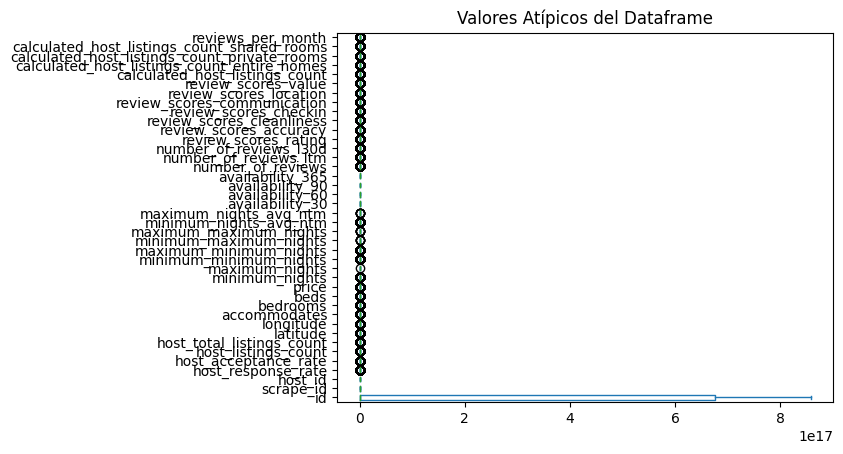

In [ ]:
fig = plt.figure(figsize = (15, 8))
df.plot(kind="box", vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show()


Para poder tratar los valores atípicos utilizaremos el método de "Método Desviación Estándar" en el cual se encuentran los valores extremos.

In [ ]:
y=df
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

Limite Superior Permitido id                                              1.329210e+18
scrape_id                                       2.023033e+13
host_id                                         6.520127e+08
host_response_rate                              1.899462e+00
host_acceptance_rate                            1.805987e+00
host_listings_count                             2.528303e+02
host_total_listings_count                       4.262030e+02
latitude                                        1.953257e+01
longitude                                      -9.906563e+01
accommodates                                    9.933140e+00
bedrooms                                        4.967931e+00
beds                                            6.932330e+00
price                                           5.649374e+04
minimum_nights                                  8.491454e+01
maximum_nights                                  2.018372e+03
minimum_minimum_nights                          7.457044e+0

Como siguiente paso obtenemos los datos, y convertimos los outliers en nulos en el Dataframe.

In [ ]:
df= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df.head(20)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2056638,20230329041210,10531228,1.00,0.00,3.0,7.0,19.35353,-99.16299,3.0,1.0,1.0,1434.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324.0,21.0,0.0,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
Entire home/apt,2072354,20230329041210,16840050,0.00,0.00,3.0,3.0,19.35358,-99.16948,2.0,1.0,1.0,830.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346.0,61.0,1.0,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
Entire home/apt,696037,20230329041210,3531879,1.00,0.90,4.0,4.0,19.44180,-99.18402,6.0,3.0,3.0,1469.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87.0,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31
Entire home/apt,35797,20230329041210,153786,0.00,0.00,1.0,1.0,19.38283,NaN,2.0,1.0,1.0,3658.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
Entire home/apt,44616,20230329041210,196253,1.00,0.86,16.0,16.0,19.41162,-99.17794,NaN,NaN,NaN,18000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357.0,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
Entire home/apt,2075738,20230329041210,2339771,1.00,0.70,1.0,2.0,19.41909,-99.16043,2.0,1.0,1.0,2561.0,2.0,30.0,2.0,2.0,30.0,30.0,2.0,30.0,2,13,19,240.0,78.0,16.0,1.0,4.87,4.90,4.71,4.91,4.85,5.00,4.83,1.0,1.0,0.0,0.0,0.70
Entire home/apt,56074,20230329041210,265650,1.00,0.95,2.0,6.0,19.43977,-99.15605,2.0,1.0,1.0,650.0,3.0,250.0,3.0,3.0,250.0,250.0,3.0,250.0,0,0,0,144.0,84.0,15.0,0.0,4.87,4.95,4.88,4.98,4.94,4.75,4.79,1.0,1.0,0.0,0.0,0.58
Private room,61792,20230329041210,299558,1.00,1.00,2.0,3.0,19.41083,-99.18057,2.0,1.0,1.0,1089.0,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,18,48,78,168.0,62.0,6.0,0.0,4.92,4.89,4.90,4.92,4.95,4.94,4.87,2.0,0.0,2.0,0.0,0.94
Entire home/apt,704779,20230329041210,2872228,1.00,1.00,13.0,14.0,19.43103,-99.14661,2.0,1.0,1.0,943.0,2.0,60.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,25,42,66,156.0,18.0,3.0,1.0,4.72,4.75,4.75,4.63,4.75,4.88,4.81,13.0,11.0,2.0,0.0,0.15


Después lo que se realizó fue reemplazar los valores atípicos que se encuentran ahora como valores nulos con el promedio.

In [ ]:
df = df.fillna(round(df.mean(),1))
df

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2056638,20230329041210,10531228,1.0,0.00,3.0,7.0,19.353530,-99.162990,3.0,1.0,1.0,1434.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324.0,21.0,0.0,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
Entire home/apt,2072354,20230329041210,16840050,0.0,0.00,3.0,3.0,19.353580,-99.169480,2.0,1.0,1.0,830.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346.0,61.0,1.0,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
Entire home/apt,696037,20230329041210,3531879,1.0,0.90,4.0,4.0,19.441800,-99.184020,6.0,3.0,3.0,1469.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87.0,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31
Entire home/apt,35797,20230329041210,153786,0.0,0.00,1.0,1.0,19.382830,-99.200000,2.0,1.0,1.0,3658.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
Entire home/apt,44616,20230329041210,196253,1.0,0.86,16.0,16.0,19.411620,-99.177940,3.1,1.5,1.8,18000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357.0,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Entire home/apt,853923589855678923,20230329041210,488030249,1.0,1.00,3.0,4.0,19.396663,-99.148145,2.0,1.0,1.0,760.0,3.0,365.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,17,47,77,352.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,2.0,2.0,0.0,0.0,1.14
Entire home/apt,853966732274073000,20230329041210,506816029,0.0,0.00,1.0,1.0,19.392023,-99.118722,7.0,2.0,3.0,1520.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,365.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
Private room,854225071295768399,20230329041210,154670560,0.0,0.96,1.0,6.0,19.371088,-99.190186,2.0,2.0,1.0,533.0,5.0,365.0,5.0,5.0,365.0,365.0,5.0,365.0,29,32,32,180.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14


Después desplegamos la cuenta de cada tipo en el index para seleccionar los dos tipos de habitación con los que se trabajará.

In [ ]:
indice_counts = df.index.value_counts()
print(indice_counts)

Entire home/apt    15602
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64


Después para comprobar lo anteriormente realizado generamos un código que nos muestre la suma de todas las filas con valores nulos de cada columna, el cual nos muestra que no existen valores nulos.

In [ ]:
valores_nulos = df.isnull().sum()
valores_nulos

id                                              0
scrape_id                                       0
host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0


Hecho esto generaremos dos dataframes distintos, uno que contenga únicamente los property_type de "Entire rental unit" y otro de "Entire condo".

In [ ]:
property_type = "Entire home/apt"
df_Entire_home_apt = df.loc[df.index == property_type]
df_Entire_home_apt

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2056638,20230329041210,10531228,1.0,0.00,3.0,7.0,19.353530,-99.162990,3.0,1.0,1.0,1434.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324.0,21.0,0.0,0.0,4.95,4.71,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
Entire home/apt,2072354,20230329041210,16840050,0.0,0.00,3.0,3.0,19.353580,-99.169480,2.0,1.0,1.0,830.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346.0,61.0,1.0,0.0,4.85,4.90,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
Entire home/apt,696037,20230329041210,3531879,1.0,0.90,4.0,4.0,19.441800,-99.184020,6.0,3.0,3.0,1469.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87.0,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31
Entire home/apt,35797,20230329041210,153786,0.0,0.00,1.0,1.0,19.382830,-99.200000,2.0,1.0,1.0,3658.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14
Entire home/apt,44616,20230329041210,196253,1.0,0.86,16.0,16.0,19.411620,-99.177940,3.1,1.5,1.8,18000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357.0,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Entire home/apt,853790308958785669,20230329041210,29239005,1.0,1.00,3.0,3.0,19.411210,-99.174161,2.0,1.0,1.0,980.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,7,37,67,342.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,3.0,3.0,0.0,0.0,1.14
Entire home/apt,853923589855678923,20230329041210,488030249,1.0,1.00,3.0,4.0,19.396663,-99.148145,2.0,1.0,1.0,760.0,3.0,365.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,17,47,77,352.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,2.0,2.0,0.0,0.0,1.14
Entire home/apt,853966732274073000,20230329041210,506816029,0.0,0.00,1.0,1.0,19.392023,-99.118722,7.0,2.0,3.0,1520.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,365.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,1.0,0.0,0.0,1.14


In [ ]:
property_type = "Private room"
df_Private_room = df.loc[df.index == property_type]
df_Private_room

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Private room,61792,20230329041210,299558,1.0,1.00,2.0,3.0,19.410830,-99.180570,2.0,1.0,1.0,1089.0,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,18,48,78,168.0,62.0,6.0,0.0,4.92,4.89,4.90,4.92,4.95,4.94,4.87,2.0,0.0,2.0,0.0,0.94
Private room,760912,20230329041210,3817743,0.0,0.00,1.0,1.0,19.408910,-99.160830,2.0,1.0,1.0,726.0,1.0,14.0,1.0,1.0,14.0,14.0,1.0,14.0,28,58,88,363.0,5.0,0.0,0.0,4.75,4.60,4.20,5.00,4.60,4.80,4.60,1.0,0.0,1.0,0.0,0.04
Private room,2088218,20230329041210,10659485,0.0,0.00,1.0,2.0,19.340220,-99.153060,1.0,1.0,1.0,375.0,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,0,0,9,284.0,5.0,0.0,0.0,4.40,5.00,4.60,5.00,4.80,4.40,4.40,1.0,0.0,1.0,0.0,0.04
Private room,2093036,20230329041210,3083561,0.0,0.00,1.0,2.0,19.441780,-99.202020,2.0,1.0,2.0,2835.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,30,60,90,365.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14
Private room,131610,20230329041210,647454,1.0,0.00,3.0,4.0,19.354160,-99.164880,2.0,1.0,1.0,1244.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,3.0,1.0,2.0,0.0,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Private room,856473895554110501,20230329041210,505303275,0.0,0.00,6.0,6.0,19.424343,-99.166729,4.0,1.0,2.0,1280.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,0,0,27,301.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,6.0,1.0,5.0,0.0,1.14
Private room,853707681690048732,20230329041210,506768013,0.0,0.00,1.0,1.0,19.433628,-99.181902,2.0,2.0,3.0,750.0,2.0,31.0,2.0,2.0,31.0,31.0,2.0,31.0,26,56,86,176.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14
Private room,853746847434924262,20230329041210,68325043,1.0,1.00,1.0,1.0,19.427807,-99.171424,2.0,1.0,1.0,600.0,1.0,60.0,1.0,1.0,60.0,60.0,1.0,60.0,12,42,70,345.0,0.0,0.0,0.0,4.84,4.90,4.87,4.93,4.93,4.94,4.82,1.0,0.0,1.0,0.0,1.14


Ya teniendo nuestros dos dataframes analizaremos la correlación que existe en cada tipo de habitación elegida respecto a las variables siguientes en el siguiente orden (dependiente, independiente):

***Variables:***


1. “**host_acceptance_rate** vs **host_response_rate**”

2. “**review_scores_location** vs **review_scores_cleanliness**”

3. “**host_acceptance_rate** vs **price**”

4. “**availability_365** vs **number_of_reviews**”

5. “**host_acceptance_rate** vs **number_of_reviews**”

6. “**reviews_per_month** vs **review_scores_communication**”

Para esto generaramos una función que calcula la correlación entre dos columnas/atributos/variables de un DataFrame, ajusta un modelo de regresión lineal, realiza predicciones y además creamos un gráfico para visualizar la relación y devuelve las medidas de rendimiento (coeficiente de determinación y coeficiente de correlación).

In [ ]:
def correlacion(df, independiente, dependiente):
  print(f"Correlación entre {independiente} y {dependiente}")

  X = df[[independiente]]
  y = df[dependiente]

  modelo_c= LinearRegression()
  modelo_c.fit(X, y)

  print('Model dict: ', modelo_c.__dict__)

  y_predict = modelo_c.predict(X)

  if 'Predicciones' in df:
    df.drop('Predicciones', axis=1, inplace=True)

  df.insert(0, 'Predicciones', y_predict)

  sns.scatterplot(x=independiente, y=dependiente, color="blue", data=df)
  sns.scatterplot(x=independiente, y='Predicciones', color="red", data=df)
  sns.lineplot(x=independiente, y='Predicciones', color="red", data=df)
  plt.title(f"Correlación entre {independiente} y {dependiente}")
  plt.show()

  c_determinacion = modelo_c.score(X, y)
  print('El coeficiente de determinación es:', c_determinacion)
  c_correlacion = np.sqrt(c_determinacion)
  print('El coeficiente de correlacion es:', c_correlacion)
  print()

  return c_determinacion, c_correlacion

### **Entire home/apt**

Correlación entre host_acceptance_rate y host_response_rate
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.76330563]), 'rank_': 1, 'singular_': array([36.23842737]), 'intercept_': 0.20149136112820698}


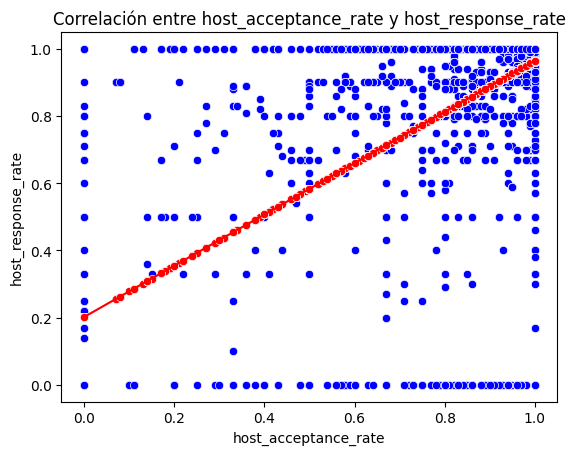

El coeficiente de determinación es: 0.479760875921861
El coeficiente de correlacion es: 0.6926477285907036

Correlación entre host_acceptance_rate y price
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-426.81597886]), 'rank_': 1, 'singular_': array([36.23842737]), 'intercept_': 2108.83035534214}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


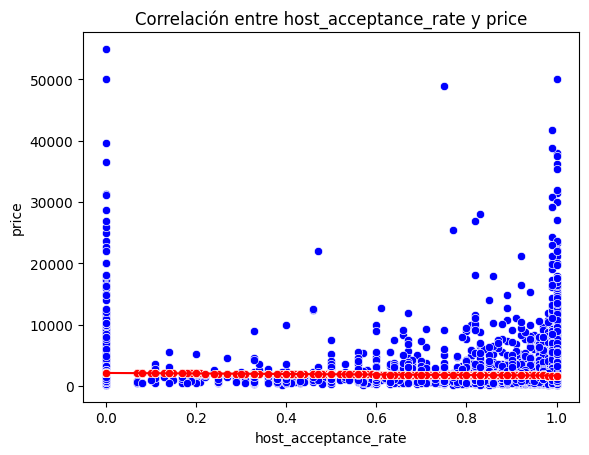

El coeficiente de determinación es: 0.003069876271842076
El coeficiente de correlacion es: 0.055406464170185736

Correlación entre host_acceptance_rate y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([23.15545622]), 'rank_': 1, 'singular_': array([36.23842737]), 'intercept_': 14.639311896185465}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


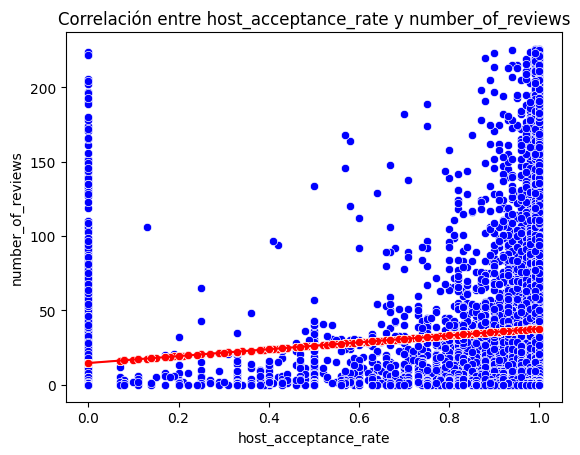

El coeficiente de determinación es: 0.022688325551073585
El coeficiente de correlacion es: 0.15062644373108455

Correlación entre review_scores_location y review_scores_cleanliness
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.35561465]), 'rank_': 1, 'singular_': array([21.16852147]), 'intercept_': 3.0795720080242956}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


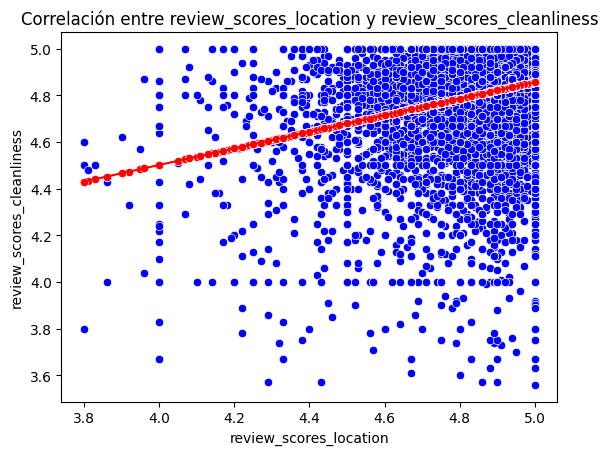

El coeficiente de determinación es: 0.07941107507968947
El coeficiente de correlacion es: 0.2817997073804185

Correlación entre availability_365 y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.02248443]), 'rank_': 1, 'singular_': array([15386.77636619]), 'intercept_': 40.27534883700753}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


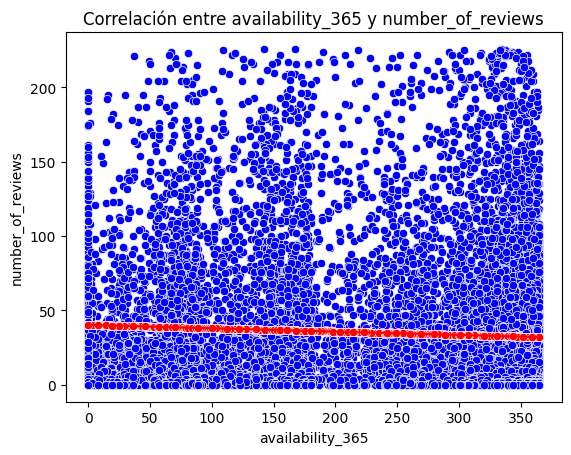

El coeficiente de determinación es: 0.003856701380679395
El coeficiente de correlacion es: 0.06210234601590663

Correlación entre reviews_per_month y review_scores_communication
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.00121597]), 'rank_': 1, 'singular_': array([170.80888529]), 'intercept_': 4.872310755587401}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


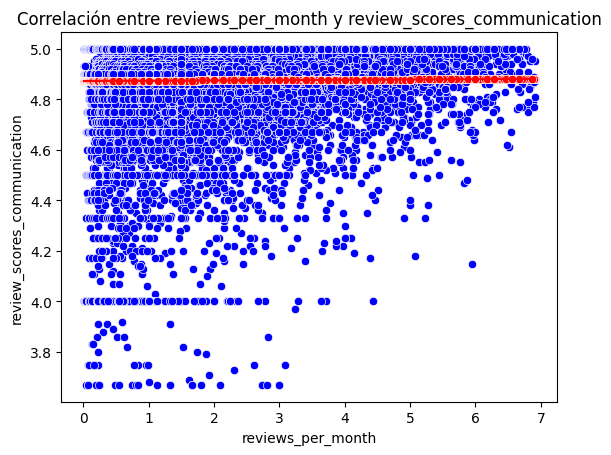

El coeficiente de determinación es: 8.011089992820963e-05
El coeficiente de correlacion es: 0.008950469257430564



(8.011089992820963e-05, 0.008950469257430564)

In [ ]:
correlacion(df_Entire_home_apt,'host_acceptance_rate','host_response_rate')
correlacion(df_Entire_home_apt,'host_acceptance_rate','price')
correlacion(df_Entire_home_apt,'host_acceptance_rate','number_of_reviews')
correlacion(df_Entire_home_apt,'review_scores_location','review_scores_cleanliness')
correlacion(df_Entire_home_apt,'availability_365','number_of_reviews')
correlacion(df_Entire_home_apt,'reviews_per_month','review_scores_communication')

Además para poder ver la correlación entre las variables, utilizamos .corr() para poder generar una tabla de correlaciones entre las variables.

In [ ]:
df_Entire_home_apt.corr()

,Predicciones,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones,1.000000,0.126022,NaN,0.094188,0.230325,0.231007,0.149698,0.116394,0.144351,0.105623,0.066117,-0.019294,0.033644,-0.061187,-0.175344,-0.019791,-0.174970,-0.131015,0.110814,0.127271,-0.160526,0.124844,0.007503,0.060740,0.087822,0.076929,0.417414,0.723990,0.624060,0.029752,0.025251,0.036461,-0.016458,0.008950,-0.014529,0.047682,0.185428,0.150868,0.054274,-0.030282,1.000000
id,0.126022,1.000000,NaN,0.311832,0.118779,0.106830,0.101905,0.087377,0.064576,-0.005775,0.049256,0.049986,0.014465,0.047712,-0.049049,-0.235044,-0.047014,-0.023612,-0.233997,-0.231252,-0.038386,-0.234793,0.119279,0.132542,0.136475,0.169603,-0.438009,-0.226211,0.027348,0.039957,0.012795,0.053816,-0.005022,0.011146,0.003413,0.013003,0.108157,0.137938,0.091980,-0.015040,0.126022
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.094188,0.311832,NaN,1.000000,0.007484,0.045167,0.112307,0.090770,0.006803,0.048368,-0.003167,-0.008422,0.002825,-0.006221,-0.106284,-0.052008,-0.099822,-0.091148,-0.049707,-0.043518,-0.095993,-0.045892,0.151000,0.153565,0.144637,0.101539,-0.194339,-0.049610,0.027545,-0.050104,-0.051038,-0.028047,-0.059279,-0.056020,-0.060026,-0.054363,0.058151,0.082921,-0.059679,-0.024988,0.094188
host_response_rate,0.230325,0.118779,NaN,0.007484,1.000000,0.692648,0.162665,0.150600,0.081132,0.038939,0.040820,-0.014728,0.037798,-0.051632,-0.167649,0.018226,-0.170862,-0.137363,0.093784,0.108044,-0.158897,0.103478,-0.001699,0.065789,0.100391,0.115161,0.147271,0.242595,0.241269,-0.011045,-0.028767,0.007237,-0.039807,-0.031915,-0.035913,-0.034508,0.168634,0.163763,0.085423,0.016113,0.230325
host_acceptance_rate,0.231007,0.106830,NaN,0.045167,0.692648,1.000000,0.160207,0.146302,0.091668,0.019169,0.024495,-0.039917,0.016691,-0.055406,-0.208394,0.029308,-0.211896,-0.177578,0.143379,0.154752,-0.200756,0.150790,-0.017837,0.037535,0.066894,0.099004,0.150626,0.254811,0.228299,-0.023086,-0.039613,0.005314,-0.058569,-0.047978,-0.047048,-0.039055,0.168916,0.165036,0.094899,0.013949,0.231007
host_listings_count,0.149698,0.101905,NaN,0.112307,0.162665,0.160207,1.000000,0.866949,0.112903,-0.071035,0.009981,-0.033451,-0.025600,0.068231,-0.089933,-0.029535,-0.089366,-0.055219,0.068467,0.076648,-0.079226,0.072897,0.074614,0.098602,0.099663,0.050083,0.009322,0.096922,0.075401,-0.073220,-0.057754,-0.006782,-0.084651,-0.083899,-0.031878,-0.095279,0.710590,0.762868,0.268803,0.081901,0.149698
host_total_listings_count,0.116394,0.087377,NaN,0.090770,0.150600,0.146302,0.866949,1.000000,0.102664,-0.068954,0.021719,-0.022203,-0.012570,0.065688,-0.085821,-0.023136,-0.084522,-0.048271,0.060751,0.066388,-0.075256,0.063527,0.069354,0.089659,0.089082,0.044399,0.008243,0.073568,0.056284,-0.087922,-0.066926,-0.021143,-0.100741,-0.097636,-0.024611,-0.103619,0.622999,0.663750,0.294805,0.059198,0.116394
latitude,0.144351,0.064576,NaN,0.006803,0.081132,0.091668,0.112903,0.102664,1.000000,0.117772,0.029858,-0.014124,0.003287,0.054352,-0.062882,-0.020929,-0.067847,-0.044000,0.014283,0.014877,-0.060137,0.016048,-0.032407,-0.011381,-0.004548,-0.018743,0.066

Pero para poder ver de manera más clara los coeficientes de correlación entre las variables determinadas, definimos el siguiente código:

In [ ]:
correlacion1 = df_Entire_home_apt['host_acceptance_rate'].corr(df_Entire_home_apt['host_response_rate'])
correlacion2 = df_Entire_home_apt['host_acceptance_rate'].corr(df_Entire_home_apt['price'])
correlacion3 = df_Entire_home_apt['host_acceptance_rate'].corr(df_Entire_home_apt['number_of_reviews'])
correlacion4 = df_Entire_home_apt['review_scores_location'].corr(df_Entire_home_apt['review_scores_cleanliness'])
correlacion5 = df_Entire_home_apt['availability_365'].corr(df_Entire_home_apt['number_of_reviews'])
correlacion6 = df_Entire_home_apt['reviews_per_month'].corr(df_Entire_home_apt['review_scores_communication'])

print(f"La correlación entre host_acceptance_rate y host_response_rate es: {correlacion1:.2f}")
print(f"La correlación entre host_acceptance_rate y price es: {correlacion2:.2f}")
print(f"La correlación entre host_acceptance_rate y number_of_reviews es: {correlacion3:.2f}")
print(f"La correlación entre review_scores_location y review_scores_cleanliness es: {correlacion4:.2f}")
print(f"La correlación entre availability_365 y number_of_reviews es: {correlacion5:.2f}")
print(f"La correlación entre reviews_per_month y review_scores_communication es: {correlacion6:.2f}")

La correlación entre host_acceptance_rate y host_response_rate es: 0.69
La correlación entre host_acceptance_rate y price es: -0.06
La correlación entre host_acceptance_rate y number_of_reviews es: 0.15
La correlación entre review_scores_location y review_scores_cleanliness es: 0.28
La correlación entre availability_365 y number_of_reviews es: -0.06
La correlación entre reviews_per_month y review_scores_communication es: 0.01


Visto esto, podemos observar que la correlación más alta es entre las variables **host_acceptance_rate** y **host_response_rate** con 0.69.

### **Predicción:**
(14.22675996 * host_acceptance_rate) + (14.09214677 * host_response_rate) + 6.216745740909847

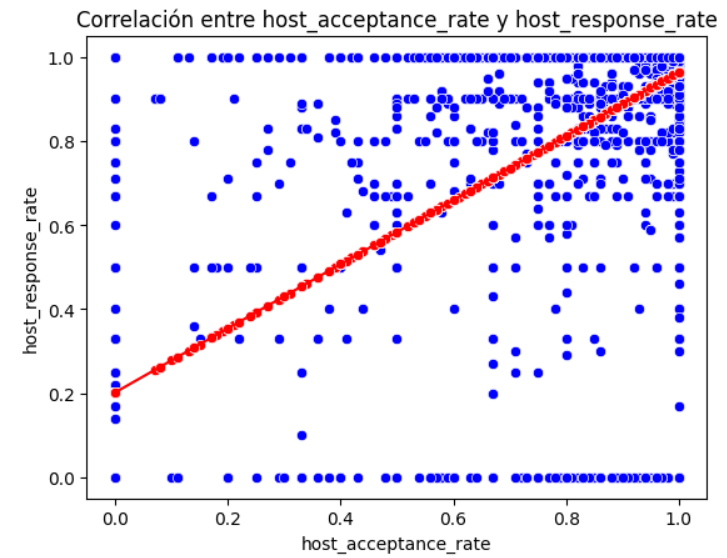

### **Private room**

Correlación entre host_acceptance_rate y host_response_rate
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.68802204]), 'rank_': 1, 'singular_': array([33.22424003]), 'intercept_': 0.21454401879390772}


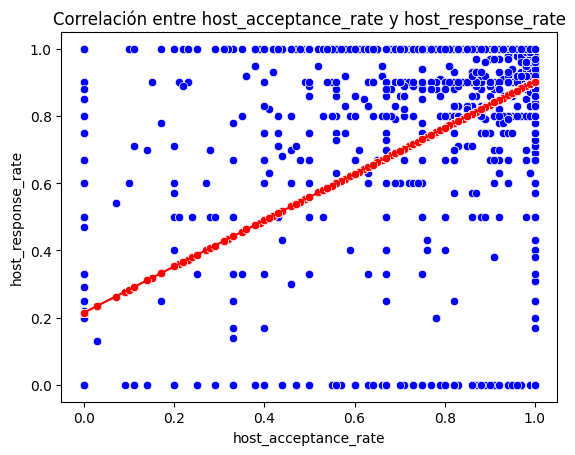

El coeficiente de determinación es: 0.3824069659528214
El coeficiente de correlacion es: 0.6183906256993401

Correlación entre host_acceptance_rate y price
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-318.45571097]), 'rank_': 1, 'singular_': array([33.22424003]), 'intercept_': 1111.9712033965677}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


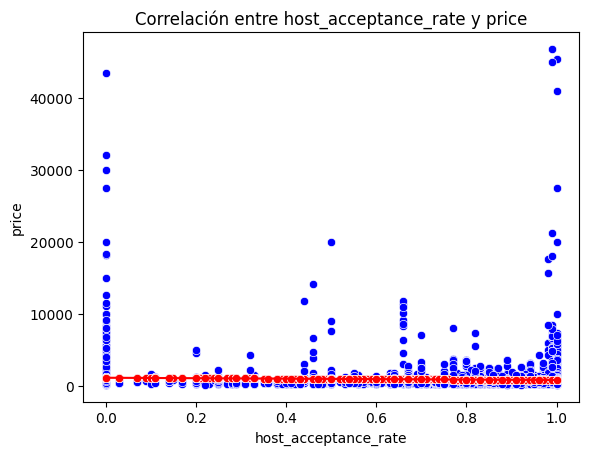

El coeficiente de determinación es: 0.004640145475450885
El coeficiente de correlacion es: 0.06811861328191353

Correlación entre host_acceptance_rate y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([20.72846027]), 'rank_': 1, 'singular_': array([33.22424003]), 'intercept_': 4.93072755432846}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


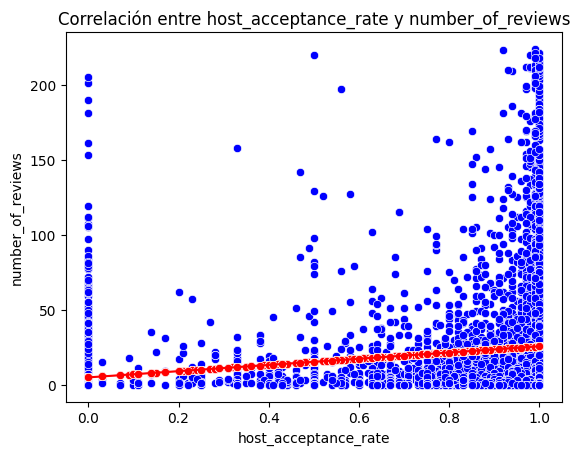

El coeficiente de determinación es: 0.04560252120115471
El coeficiente de correlacion es: 0.21354746826210494

Correlación entre review_scores_location y review_scores_cleanliness
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.45909318]), 'rank_': 1, 'singular_': array([16.38486529]), 'intercept_': 2.557648293112445}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


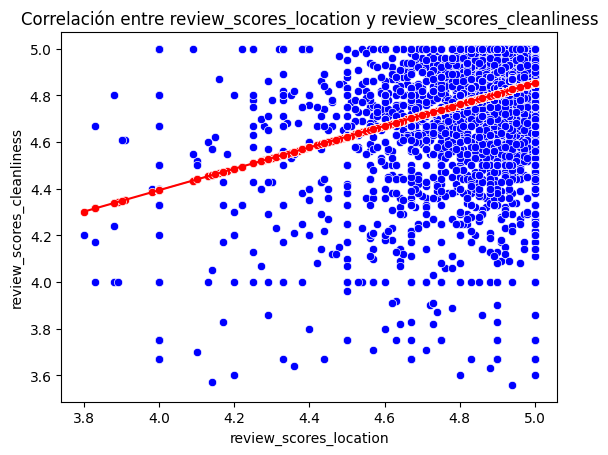

El coeficiente de determinación es: 0.11948094603350656
El coeficiente de correlacion es: 0.3456601597429281

Correlación entre availability_365 y number_of_reviews
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.01736598]), 'rank_': 1, 'singular_': array([11333.32566802]), 'intercept_': 25.34007625365941}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


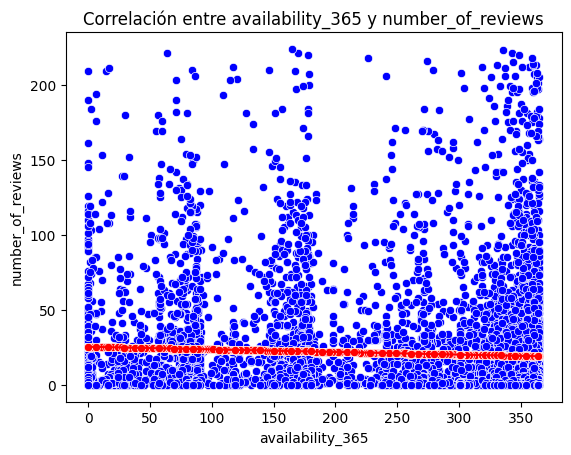

El coeficiente de determinación es: 0.0037244137161634994
El coeficiente de correlacion es: 0.06102797486533122

Correlación entre reviews_per_month y review_scores_communication
Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.01087975]), 'rank_': 1, 'singular_': array([102.9917746]), 'intercept_': 4.8840874487108}


<ipython-input-51-873d34963ab3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Predicciones', axis=1, inplace=True)


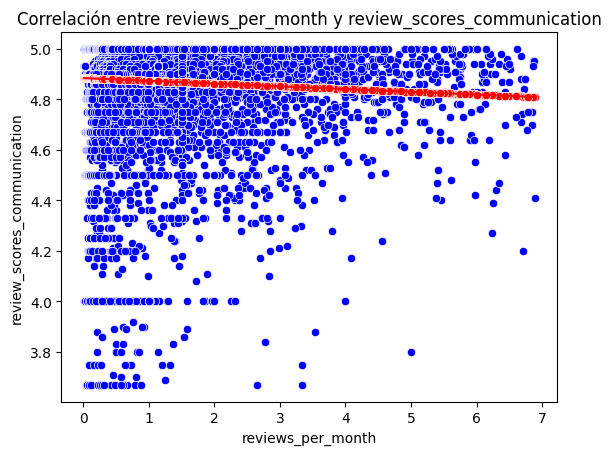

El coeficiente de determinación es: 0.0035674448835659733
El coeficiente de correlacion es: 0.059728091243283286



(0.0035674448835659733, 0.059728091243283286)

In [ ]:
correlacion(df_Private_room ,'host_acceptance_rate','host_response_rate')
correlacion(df_Private_room ,'host_acceptance_rate','price')
correlacion(df_Private_room ,'host_acceptance_rate','number_of_reviews')
correlacion(df_Private_room ,'review_scores_location','review_scores_cleanliness')
correlacion(df_Private_room ,'availability_365','number_of_reviews')
correlacion(df_Private_room ,'reviews_per_month','review_scores_communication')

Además para poder ver la correlación entre las variables, utilizamos .corr() para poder generar una tabla de correlaciones entre todas las variables numéricas.

In [ ]:
df_Private_room.corr()

,Predicciones,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Predicciones,1.000000,-0.200735,NaN,-0.128667,-0.218854,-0.200594,-0.126225,-0.098109,-0.151647,-0.073928,-0.054110,0.071519,0.048280,0.042762,0.119136,0.069164,0.117466,0.117179,-0.039692,-0.040565,0.118490,-0.040919,-0.034454,-0.079751,-0.099017,-0.052123,-0.465582,-0.694876,-0.596685,0.039195,0.039026,0.030109,0.043191,0.059728,0.025987,0.023244,-0.139709,-0.128884,-0.163058,0.034205,-1.000000
id,-0.200735,1.000000,NaN,0.361856,0.175514,0.152557,0.159286,0.143204,0.098459,0.072966,0.063862,0.026582,0.015327,-0.013942,-0.089340,-0.211718,-0.087105,-0.086177,-0.208698,-0.199075,-0.088239,-0.202262,0.097080,0.112256,0.117525,0.163500,-0.284560,-0.096709,0.070797,0.002058,-0.008800,0.008295,-0.026468,-0.003673,-0.002222,-0.012711,0.173666,0.145594,0.058097,-0.019131,0.200735
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,-0.128667,0.361856,NaN,1.000000,0.011272,0.081880,0.065533,0.055354,0.089391,0.152988,0.105765,0.028798,0.077057,0.007807,-0.067392,-0.077070,-0.064786,-0.064999,-0.094071,-0.082024,-0.065826,-0.086677,0.147376,0.140474,0.127306,0.159196,-0.153553,-0.007852,0.042241,-0.071532,-0.077298,-0.025621,-0.067003,-0.084875,-0.077424,-0.081635,0.112993,0.052993,0.026612,-0.010858,0.128667
host_response_rate,-0.218854,0.175514,NaN,0.011272,1.000000,0.618391,0.219432,0.185316,0.089536,0.068993,0.064380,-0.087738,-0.013907,-0.082540,-0.165774,0.030151,-0.159147,-0.159441,0.119607,0.134051,-0.161367,0.129579,-0.072992,-0.017621,0.015836,0.085638,0.228100,0.300488,0.277048,-0.086474,-0.106862,-0.101384,-0.104365,-0.108871,-0.081557,-0.084075,0.218987,0.124619,0.269981,0.028469,0.218854
host_acceptance_rate,-0.200594,0.152557,NaN,0.081880,0.618391,1.000000,0.184220,0.160392,0.072896,0.051456,0.072119,-0.092976,-0.012493,-0.068119,-0.187982,0.014217,-0.183697,-0.182667,0.146625,0.139845,-0.184433,0.140706,-0.064783,-0.017912,0.006370,0.083037,0.213547,0.302298,0.253909,-0.096367,-0.120785,-0.088737,-0.107259,-0.117750,-0.074057,-0.102208,0.190072,0.111573,0.289227,0.022811,0.200594
host_listings_count,-0.126225,0.159286,NaN,0.065533,0.219432,0.184220,1.000000,0.747176,0.171074,-0.018305,0.142259,-0.030890,0.058770,0.053332,-0.052150,-0.036979,-0.050098,-0.039746,0.008755,0.037293,-0.049155,0.029157,0.064131,0.075159,0.075448,0.094485,0.011858,0.068178,0.050067,-0.138754,-0.096024,-0.082223,-0.088457,-0.100064,-0.023185,-0.132884,0.910710,0.606458,0.391067,0.130534,0.126225
host_total_listings_count,-0.098109,0.143204,NaN,0.055354,0.185316,0.160392,0.747176,1.000000,0.126468,-0.024902,0.117945,-0.030635,0.044600,0.061987,-0.051971,-0.025896,-0.050226,-0.030506,0.008796,0.028651,-0.048288,0.022932,0.061116,0.068654,0.068400,0.090560,0.003940,0.047375,0.046363,-0.117264,-0.079755,-0.078141,-0.091648,-0.100568,-0.032589,-0.125493,0.717038,0.530555,0.373875,0.099603,0.098109
latitude,-0.151647,0.098459,NaN,0.089391,0.089536,0.072896,0.171074,0.126468,1.000000,0.108985,0.062210,-0.036358,-0.023081,0.027750,-0.051907,-0.054436,-0.052457,-0.049003,-0.003921,0.005484,-0.051002,0.002790,0.001459,0.016317,0

Pero para poder ver de manera más clara los coeficientes de correlación entre las variables determinadas, definimos el siguiente código:

In [ ]:
correlacion1 = df_Private_room['host_acceptance_rate'].corr(df_Private_room['host_response_rate'])
correlacion2 = df_Private_room['host_acceptance_rate'].corr(df_Private_room['price'])
correlacion3 = df_Private_room['host_acceptance_rate'].corr(df_Private_room['number_of_reviews'])
correlacion4 = df_Private_room['review_scores_location'].corr(df_Private_room['review_scores_cleanliness'])
correlacion5 = df_Private_room['availability_365'].corr(df_Private_room['number_of_reviews'])
correlacion6 = df_Private_room['reviews_per_month'].corr(df_Private_room['review_scores_communication'])

print(f"La correlación entre host_acceptance_rate y host_response_rate es: {correlacion1:.2f}")
print(f"La correlación entre host_acceptance_rate y price es: {correlacion2:.2f}")
print(f"La correlación entre host_acceptance_rate y number_of_reviews es: {correlacion3:.2f}")
print(f"La correlación entre review_scores_location y review_scores_cleanliness es: {correlacion4:.2f}")
print(f"La correlación entre availability_365 y number_of_reviews es: {correlacion5:.2f}")
print(f"La correlación entre reviews_per_month y review_scores_communication es: {correlacion6:.2f}")

La correlación entre host_acceptance_rate y host_response_rate es: 0.62
La correlación entre host_acceptance_rate y price es: -0.07
La correlación entre host_acceptance_rate y number_of_reviews es: 0.21
La correlación entre review_scores_location y review_scores_cleanliness es: 0.35
La correlación entre availability_365 y number_of_reviews es: -0.06
La correlación entre reviews_per_month y review_scores_communication es: -0.06


Visto esto, podemos observar que la correlación más alta es entre las variables **host_acceptance_rate** y **host_response_rate** con 0.62.

### **Predicción:**
(14.22675996 * host_acceptance_rate) + (14.09214677 * host_response_rate) + 6.216745740909847


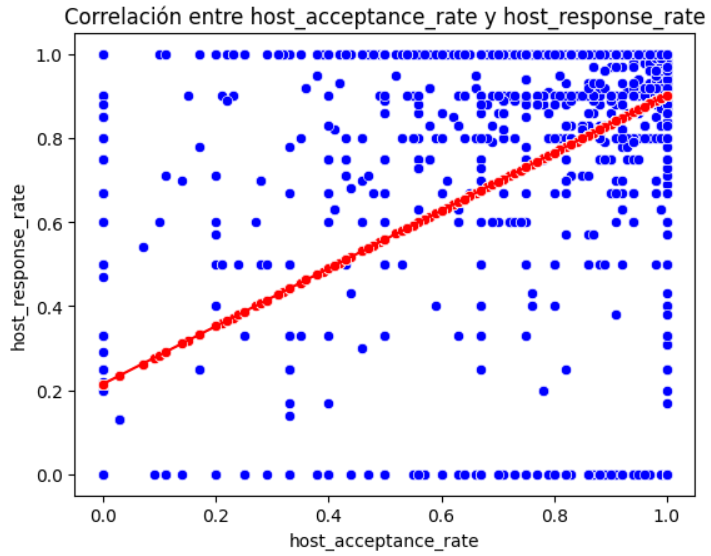

In [1]:
%%shell
jupyter nbconvert --to html /content/Actividad_4_Regresión_Lineal_Simple.ipynb

[NbConvertApp] Converting notebook /content/Actividad_4_Regresión_Lineal_Simple.ipynb to html
[NbConvertApp] Writing 2408403 bytes to /content/Actividad_4_Regresión_Lineal_Simple.html
